In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Datasets/WDBC_Train.csv")
# df = df.iloc[:, 1:]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,...,17.31,33.39,114.60,925.1,0.16480,0.34160,0.3024,0.16140,0.3321,0.08911
1,0,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,...,11.14,25.62,70.88,385.2,0.12340,0.15420,0.1277,0.06560,0.3174,0.08524
2,0,14.640,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,16.46,25.44,106.00,831.0,0.11420,0.20700,0.2437,0.07828,0.2455,0.06596
3,1,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.3829,0.18250,0.2576,0.07602
4,0,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743


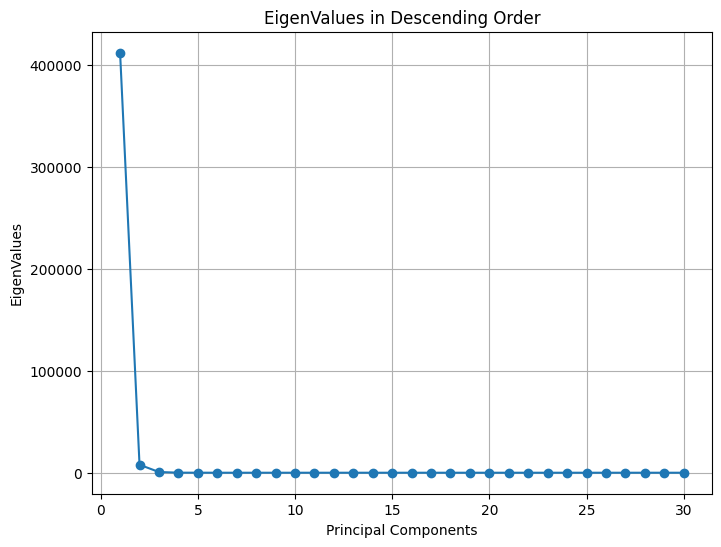

In [100]:
# 2. Perform the PCA on all attributes except the class attribute. You need to fit and trans-
# form the PCA on the original training data. Then, observe the eigenvalues and corre-
# sponding eigenvectors.
# (a) Plot the eigenvalues in the descending order of their values.
# (b) Compute the covariance matrix of transformed data and observe its nature and
# variances.


features = df.columns[1:]
pca = PCA()
pca.fit_transform(df[features])

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='-')
plt.title("EigenValues in Descending Order")
plt.xlabel("Principal Components")
plt.ylabel("EigenValues")
plt.grid()
plt.show()

In [101]:
eigenvalues = np.sort(eigenvalues)[::-1]
print (eigenvalues)

[4.12185568e+05 7.84276305e+03 7.03791734e+02 5.50284094e+01
 3.80519540e+01 2.80566690e+00 1.96987922e+00 3.30079712e-01
 1.46971276e-01 9.59788419e-02 3.35397937e-02 8.04212599e-03
 3.14242225e-03 2.14755576e-03 1.20478099e-03 6.39497376e-04
 4.19433051e-04 2.39770957e-04 1.93151182e-04 1.51280593e-04
 7.15219137e-05 5.44089900e-05 3.69655052e-05 2.47461284e-05
 1.35139503e-05 1.21699180e-05 3.97125060e-06 2.71298907e-06
 1.92870815e-06 6.77429390e-07]


In [102]:
# np.linalg.eig()

In [103]:
df.cov()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.234414,1.225047,0.802671,8.563596,118.133234,0.002573,0.014668,0.025366,0.014324,0.004072,...,1.777441,1.301511,12.393839,195.865536,0.004907,0.041064,0.061975,0.024818,0.013032,0.002372
radius_mean,1.225047,12.184709,4.552912,83.439161,1189.349922,0.008012,0.086523,0.170944,0.106929,0.009562,...,15.968465,5.963867,109.877740,1794.755757,0.010250,0.194349,0.332685,0.162759,0.029133,-0.004124
texture_mean,0.802671,4.552912,18.973931,31.667954,439.390651,-0.003746,0.045612,0.081470,0.041430,0.008636,...,6.915707,24.322167,48.576047,777.436848,0.005000,0.153609,0.198844,0.069159,0.032693,0.004538
perimeter_mean,8.563596,83.439161,31.667954,574.085832,8152.201231,0.069211,0.663552,1.256689,0.763221,0.092292,...,109.528043,41.667797,758.357724,12303.733252,0.089989,1.503610,2.485452,1.163685,0.244040,-0.008825
area_mean,118.133234,1189.349922,439.390651,8152.201231,118757.842392,0.826138,8.443669,17.193894,10.583917,1.041129,...,1562.709898,559.535408,10756.677234,179580.395929,1.035050,18.109542,32.082671,15.615218,2.419461,-0.370639
smoothness_mean,0.002573,0.008012,-0.003746,0.069211,0.826138,0.000209,0.000527,0.000650,0.000323,0.000207,...,0.013826,0.001813,0.110684,1.508971,0.000282,0.001117,0.001432,0.000510,0.000358,0.000139
compactness_mean,0.014668,0.086523,0.045612,0.663552,8.443669,0.000527,0.002777,0.003702,0.001677,0.000888,...,0.124312,0.072706,0.968938,13.502065,0.000762,0.007022,0.008924,0.002804,0.001776,0.000632
concavity_mean,0.025366,0.170944,0.081470,1.256689,17.193894,0.000650,0.003702,0.006284,0.002756,0.001161,...,0.234827,0.119684,1.748358,26.470646,0.000918,0.009060,0.014388,0.004348,0.002148,0.000725
concave_points_mean,0.014324,0.106929,0.041430,0.763221,10.583917,0.000323,0.001677,0.002756,0.001462,0.000482,...,0.146163,0.061191,1.048222,16.403237,0.000445,0.003846,0.005808,0.002259,0.000905,0.000234
symmetry_mean,0.004072,0.009562,0.008636,0.092292,1.041129,0.000207,0.000888,0.001161,0.000482,0.000759,...,0.019194,0.015933,0.170253,2.137915,0.000272,0.002100,0.002653,0.000772,0.001218,0.000227


In [104]:
diag = df.iloc[:, 0]

df_test = pd.read_csv("WDBC_Test.csv")
df_val = pd.read_csv("WDBC_Validation.csv")
diag_test = df_test.iloc[:, 0]
diag_val = df_val.iloc[:, 0]

pca2 = PCA(n_components=2)

train_pca2 = pd.DataFrame(pca2.fit_transform(df[features]))


val_pca2 = pd.DataFrame(pca2.transform(df_val[features]))
test_pca2 = pd.DataFrame(pca2.transform(df_test[features]))

train_pca2.insert(0, 'diagnosis', diag)
val_pca2.insert(0, 'diagnosis', diag_val)
test_pca2.insert(0, 'diagnosis', diag_test)

In [105]:
train_pca2.to_csv("WDBC_PCA2_Train.csv", index=False)
val_pca2.to_csv("WDBC_PCA2_Validation.csv", index=False)
test_pca2.to_csv("WDBC_PCA2_Test.csv", index=False)

print("Files succesfully created")

Files succesfully created


In [106]:
train_pca2.head()

,diagnosis,0,1
0,1,52.802015,-14.065530
1,0,-607.814127,-51.558825
2,0,-29.600317,32.675362
3,1,651.050225,212.011995
4,0,-366.139824,6.958892


In [107]:
diag = df.iloc[:, 0]

df_test = pd.read_csv("WDBC_Test.csv")
df_val = pd.read_csv("WDBC_Validation.csv")
diag_test = df_test.iloc[:, 0]
diag_val = df_val.iloc[:, 0]

pca = PCA(n_components=10)

train_pca = pd.DataFrame(pca.fit_transform(df[features]))


val_pca = pd.DataFrame(pca.transform(df_val[features]))
test_pca = pd.DataFrame(pca.transform(df_test[features]))

train_pca.insert(0, 'diagnosis', diag)
val_pca.insert(0, 'diagnosis', diag_val)
test_pca.insert(0, 'diagnosis', diag_test)

train_pca.to_csv("WDBC_PCA_Train.csv", index=False)
val_pca.to_csv("WDBC_PCA_Validation.csv", index=False)
test_pca.to_csv("WDBC_PCA_Test.csv", index=False)

print("Files succesfully created")

Files succesfully created
